# Classic Supervised Machine Learning Strategies

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
plt.xkcd()

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
sklearn.__version__

'0.21.2'

## Loading and exploring our data set

This is a database of customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past

* 0 - red: many accidents
* 1 - green: few or no accidents
* 2 - yellow: in the middle        

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv', sep=';')

In [4]:
df.head()

,speed,age,miles,group
0,98.0,44.0,25.0,1
1,118.0,54.0,24.0,1
2,111.0,26.0,34.0,0
3,97.0,25.0,10.0,2
4,114.0,38.0,22.0,1


In [5]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


In [6]:
y=df['group']

In [7]:
df.drop('group', axis='columns', inplace=True)

In [8]:
X = df.as_matrix()

### We restrict ourselves to two dimensions for now

Because this is all we really can visualize in 2d

In [9]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

# https://matplotlib.org/users/colormaps.html
# https://matplotlib.org/gallery/images_contours_and_fields/contourf_demo.html#sphx-glr-gallery-images-contours-and-fields-contourf-demo-py
cmap = ListedColormap(['#FF0000', '#0000FF', '#FFFF00'])

font_size=25
title_font_size=40

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = 10, 100
    y_min, y_max = 80, 170
#     x_min, x_max = x_data.min() - 1, x_data.max() + 1
#     y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   size=(15, 8), n_samples=300):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=size)

    if clf:
        Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])

        probaZ = Z.max(axis=1)
        probaZ = probaZ.reshape(xx.shape)
        ax.contourf(xx, yy, probaZ, cmap=plt.cm.binary, alpha=.4)

        Z = Z.argmax(axis=1)
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cmap, alpha=.3)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    samples = pd.DataFrame(np.array([x_data, y_data, ground_truth]).T).sample(n_samples, random_state=42)
    classes = samples[2]
    scatter = ax.scatter(samples[0], samples[1], c=classes, cmap=cmap, s=100, marker='o', edgecolors='k')

    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(title, fontsize=title_font_size)

    # https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_with_legend.html
    formatter = FuncFormatter(lambda s,t: "Many Accidents" if s == 0 else "No Accidents" if s == 1 else "Few Accidents")
    legend = ax.legend(*scatter.legend_elements(alpha=0.6, prop='colors', fmt=formatter), title="Classes")
    ax.add_artist(legend)
    
    return ax, scatter


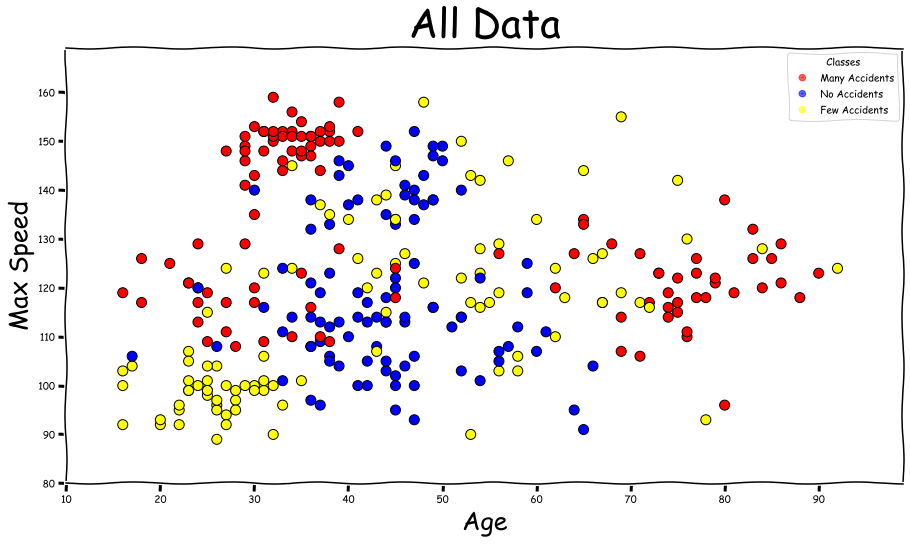

In [10]:
ax, scatter = plotPrediction(None, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="All Data")

## Splitting into test and training data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200, 3), (1200,), (300, 3), (300,))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200, 3), (1200,), (300, 3), (300,))

In [13]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

(<matplotlib.axes._subplots.AxesSubplot at 0x23aa4bb39b0>,
 <matplotlib.collections.PathCollection at 0x23aa4bd9550>)

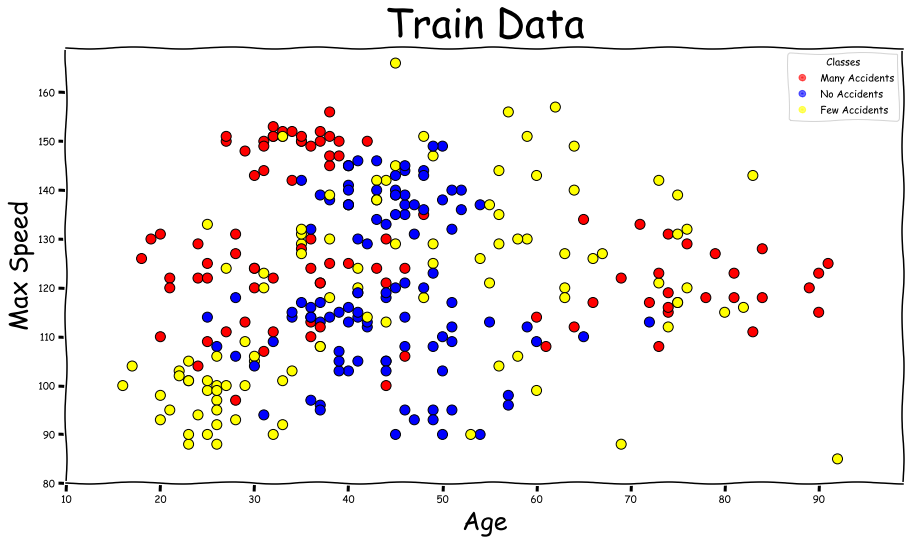

In [14]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, title="Train Data")

(<matplotlib.axes._subplots.AxesSubplot at 0x23aa4ea5550>,
 <matplotlib.collections.PathCollection at 0x23aa4ecf748>)

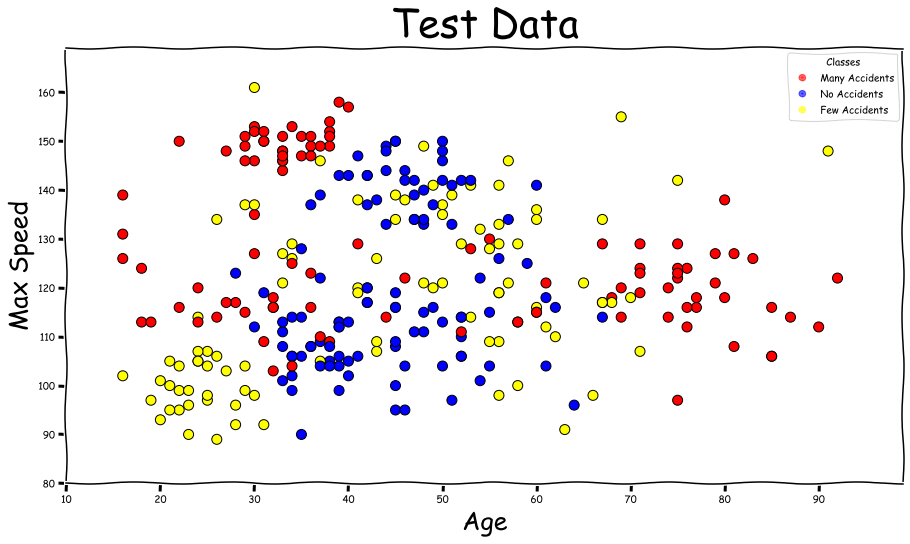

In [15]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, title="Test Data")

## Overview of most important strategies

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

https://scikit-learn.org/stable/supervised_learning.html

<img src='img/clf_comp.png'>


### Gaussian Naive Bayes

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

* _Bayes_: Bayes’ theorem gives a mean to reverse conditional probabilities
* _Naive_: refers to our assumption that all features are independent to simplify the problem
* _Gaussian_: assumption: each category can be described using a Gaussian distribution

How it works
  * learning means simply computing the mean and the standard deviation from our training data (https://machinelearningmastery.com/naive-bayes-for-machine-learning/) per category
  * prediction worky by using maximum likelihood (https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) of one of our categories
  
Features  
  * require a small amount of training data to estimate the necessary parameters
  * fast training
  * probability estimation often is poor

https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [16]:
%%time

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train_2_dim, y_train)

Wall time: 3.99 ms


In [17]:
# you can set set priors explicitly
# clf = GaussianNB(priors=[0.33, 0.33, 0.34], var_smoothing=1e-03)

# based on number of samples per category
clf.class_prior_

array([0.33416667, 0.33333333, 0.3325    ])

In [18]:
clf.class_count_

array([401., 400., 399.])

In [19]:
# mean per category
clf.theta_

array([[130.55860349,  46.27680798],
       [119.83      ,  44.865     ],
       [117.49874687,  43.26566416]])

In [20]:
clf.sigma_

array([[250.40616694, 449.40716818],
       [257.22610031,  77.24177531],
       [328.10964786, 344.32541284]])

In [21]:
input = [[100.0, 48.0], [150.0, 78.0], [100.0, 18.0]]
# should be [1, 0, 2] = [good, bad, mediocre]
clf.predict(input)

array([1, 0, 2], dtype=int64)

(<matplotlib.axes._subplots.AxesSubplot at 0x23aa4c689b0>,
 <matplotlib.collections.PathCollection at 0x23aa4c5eeb8>)

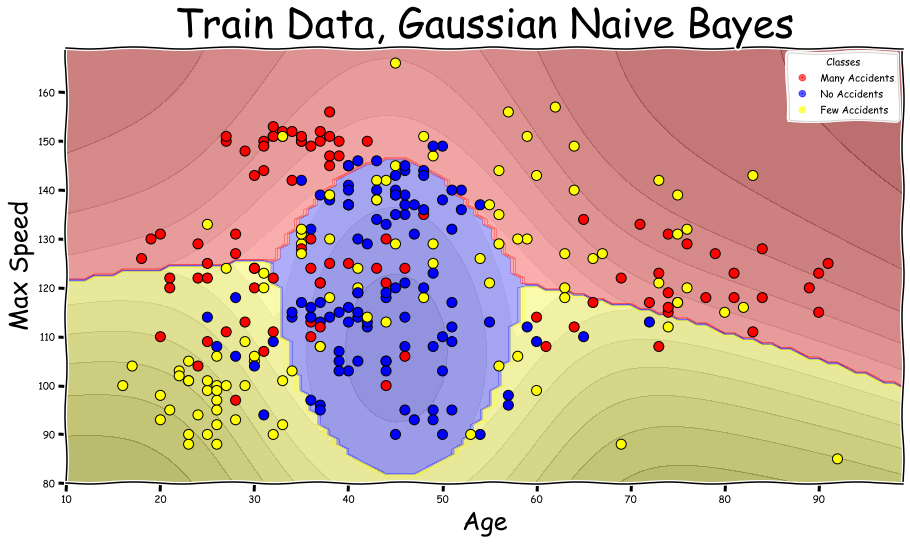

In [22]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Gaussian Naive Bayes")

In [23]:
clf.score(X_train_2_dim, y_train)

0.6083333333333333

(<matplotlib.axes._subplots.AxesSubplot at 0x23aa53efc50>,
 <matplotlib.collections.PathCollection at 0x23aa51869e8>)

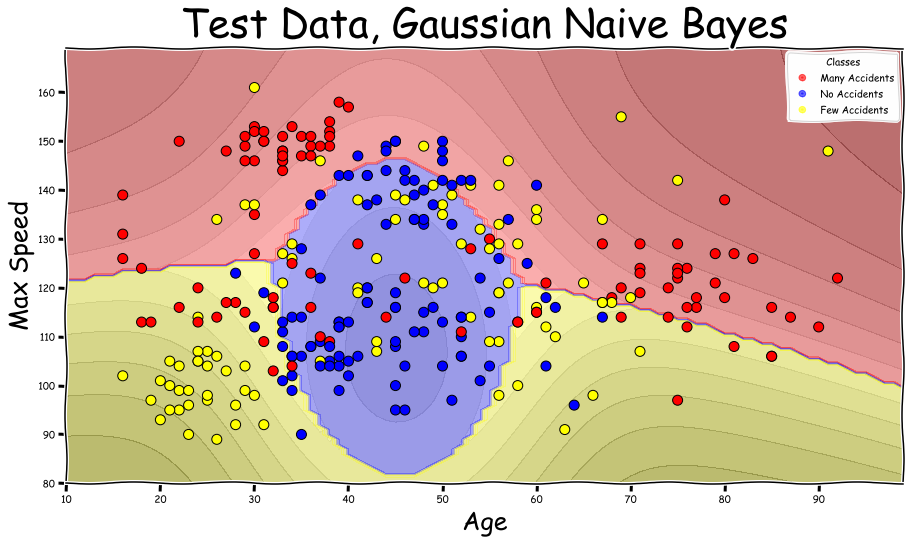

In [24]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Gaussian Naive Bayes")

In [25]:
clf.score(X_test_2_dim, y_test)

0.57